In [8]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [44]:
#getting the atributes from documented file
def get_column_list(file_path):
    column_list=list()
    with open(file_path) as file:
        for line in list(file.readlines()):
            if line[0]=="|":
                continue
            else:
                try:
                    column_list.append(line.split(':')[0])
                except:
                    continue
    column_list=[col  for col in column_list if ('\n' not in col ) ]
    column_list.append('salary')
    return column_list

In [45]:

column_list=get_column_list("/home/jovyan/work/eda02/adult.names")

In [53]:
#reading the raw data
def read_data(data_file_path,column_list):
    df_data=pd.read_csv('adult.data',header=None)
    df_data.columns=column_list
    return df_data
df_data=read_data("adult.data",column_list)
df_test=read_data('adult.test',column_list)
df_data.to_csv("Adult_Data.csv")

In [54]:
df_data.shape==df_test.shape

True

In [48]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [52]:
df_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital-status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [50]:

def unique_value_count(df_data):
    """
        unique_value_count(df_data) 
        df_data: DataFrame
        Returning the dict of count of unique values in dataset for each feature in the dictionary format"""
    unique_values=dict()
    for col in df_data.columns:
        unique_values[col]=len(df_data[col].unique())
    return unique_values
(unique_value_count(df_data))

{'age': 73,
 'workclass': 9,
 'fnlwgt': 21648,
 'education': 16,
 'education-num': 16,
 'marital-status': 7,
 'occupation': 15,
 'relationship': 6,
 'race': 5,
 'sex': 2,
 'capital-gain': 119,
 'capital-loss': 92,
 'hours-per-week': 94,
 'native-country': 42,
 'salary': 2}

<AxesSubplot: xlabel='sex,salary'>

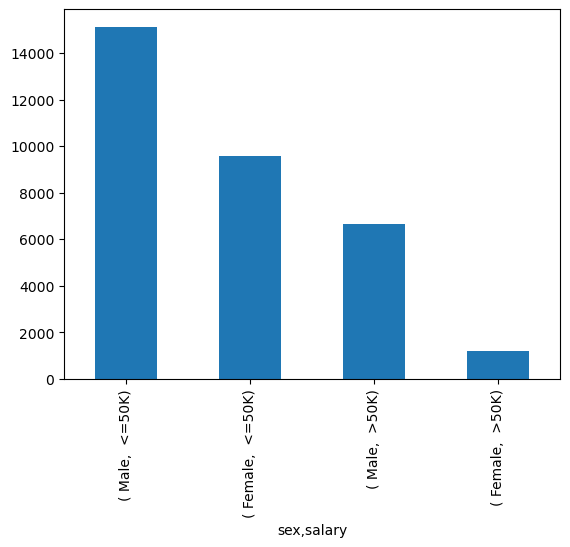

In [76]:
df_data[['sex','salary']].value_counts().plot(kind='bar')